# Filters

Animated visualizers of filters.

In [73]:
%matplotlib inline

import time

import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw
from neurodsp.plts import plot_time_series
from neurodsp.utils import create_samples
from neurodsp.filt.fir import *
from neurodsp.plts.filt import *
from neurodsp.utils import set_random_seed

In [1]:
# Import local code
from vcode.utils.data import yield_sig as yield_sig2
from vcode.plts.utils import clear_output, animate_plot

from vcode.plts.base import plot_data

## Setup

### Settings

In [ ]:
import seaborn as sns
sns.set_context('talk')

In [19]:
# Set random seed
set_random_seed(505)

In [20]:
# Signal settings
fs = 500
n_seconds = 2.5

In [59]:
# Filter settings
pass_type = 'bandpass'
f_range = (8, 12)
#f_range = 10

## Animiation

### Design a Filter

In [60]:
filt_coefs = design_fir_filter(fs, pass_type, f_range)

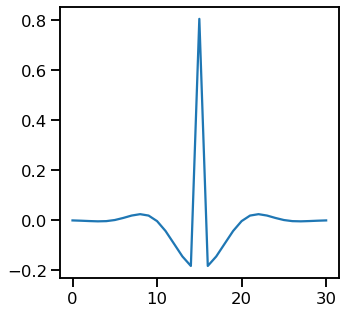

In [165]:
plot_data(filt_coefs)

In [145]:
sig = sim_powerlaw(n_seconds, fs, f_range=(2, None))

In [25]:
samps = create_samples(len(filt_coefs))

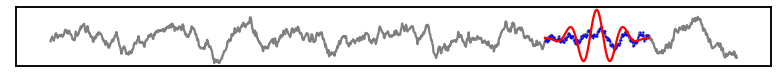

In [39]:
for ind in range(0, 1000, 100):
    clear_output(wait=True)
    _, ax = plt.subplots(figsize=[12, 2])
    plot_time_series(None, sig, alpha=0.5, ax=ax)
    plot_time_series(samps+ind, sig[samps+ind], marker='.', markersize=2, linewidth=0, colors='blue', ax=ax)
    plot_time_series(samps+ind, filt_coefs * 150, colors='red', ax=ax)
    ax.set(xticks=[], yticks=[], xlabel='', ylabel='');
    plt.show();
    time.sleep(0.25)

In [27]:
out = np.convolve(filt_coefs, sig, 'same')

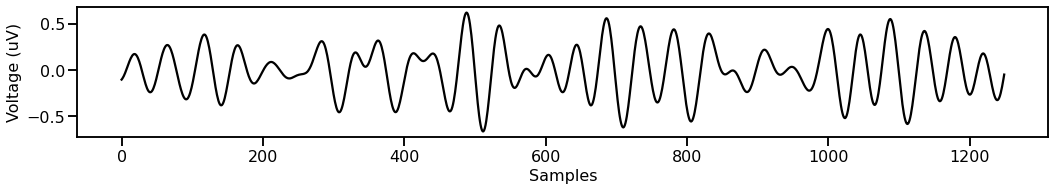

In [28]:
plot_time_series(None, out)

In [29]:
samps = create_samples(len(filt_coefs))
for ind in range(0, 1000, 100):
    print(np.dot(sig[samps+ind], filt_coefs))

-0.2998476328422149
-0.0937056313155776
0.029026582729104265
-0.34150964506984405
0.443511705957467
0.021408607558181577
0.2738039726500419
-0.0694932063797178
-0.10525377701580768
0.35404290792413123


In [30]:
outs = []
samps = create_samples(len(filt_coefs))
for ind in range(0, len(sig)-len(filt_coefs)):
    outs.append(np.dot(sig[samps+ind], filt_coefs))

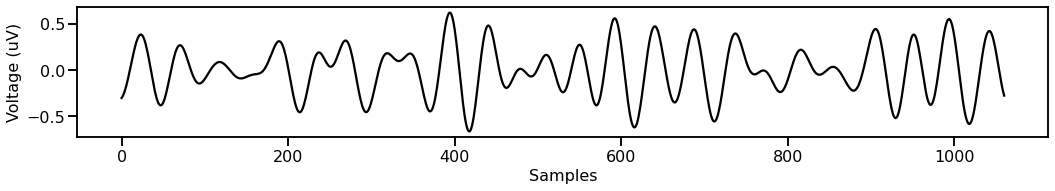

In [31]:
plot_time_series(None, np.array(outs))

## Explore Frequency Response

In [48]:
f_db, db = compute_frequency_response(filt_coefs, 1, fs)

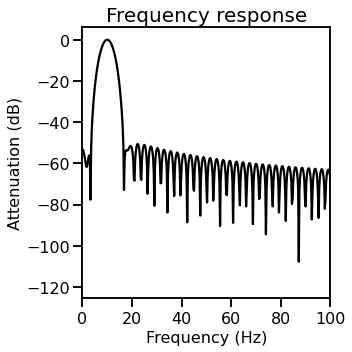

In [52]:
plot_frequency_response(f_db, db, xlim=[0, 100])

In [ ]:
# Filter settings
pass_type = 'lowpass'
#f_range = 1

In [113]:
def make_axes():
    """Make axes for combined plot.

    Placement definitions: Left, Bottom, Width, Height
    """
    
    fig = plt.figure()
    ax1 = fig.add_axes([0.0, 0.8, 0.15, 0.75])
    ax2 = fig.add_axes([0.2, 0.8, 0.75, 0.75])
    ax3 = fig.add_axes([1.0, 0.8, 0.75, 0.75])

    return fig, [ax1, ax2, ax3]

(<Figure size 432x288 with 3 Axes>, [<Axes:>, <Axes:>, <Axes:>])

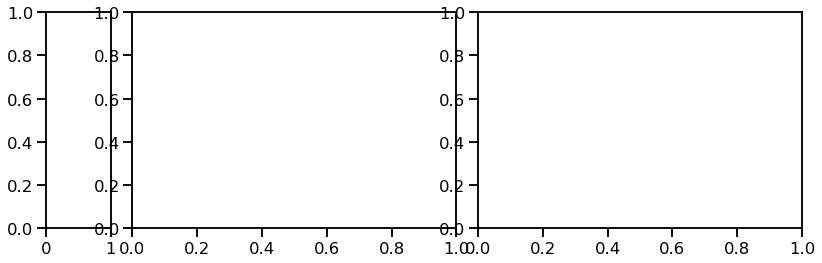

In [114]:
make_axes()

In [116]:
f_range = (1, 50)
filt_type = 'highpass'

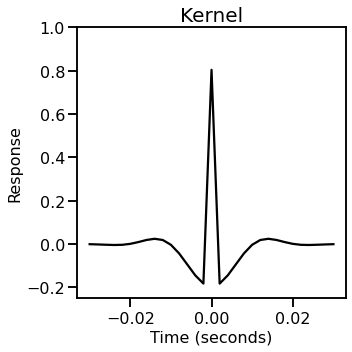

In [121]:
# S
for f_val in range(*f_range):
    filt_coefs = design_fir_filter(fs, filt_type, f_val)
    f_db, db = compute_frequency_response(filt_coefs, 1, fs)
    
    clear_output(wait=True)
    plot_impulse_response(fs, filt_coefs, ylim=[-0.25, 1])
    
    time.sleep(0.025)
    plt.show()

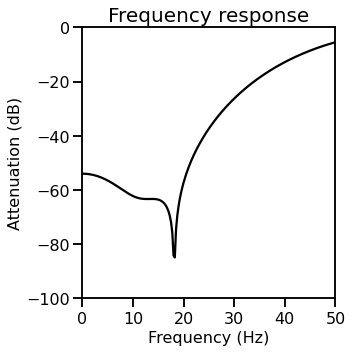

In [120]:
# S
for f_val in range(*f_range):
    filt_coefs = design_fir_filter(fs, filt_type, f_val)
    f_db, db = compute_frequency_response(filt_coefs, 1, fs)
    
    clear_output(wait=True)
    plot_frequency_response(f_db, db, xlim=[0, 50], ylim=[-100, 0])
    
    time.sleep(0.025)
    plt.show()

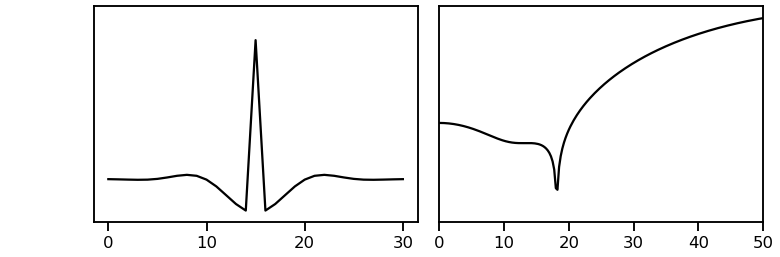

In [162]:
# S
for f_val in range(*f_range):
    
    filt_coefs = design_fir_filter(fs, filt_type, f_val)
    f_db, db = compute_frequency_response(filt_coefs, 1, fs)
    
    clear_output(wait=True)
    
    fig, axes = make_axes()
    
    axes[0].axis('off')
    #plot_impulse_response(fs, filt_coefs, ax=axes[1])
    plot_data(filt_coefs, color='black', ax=axes[1])
    axes[1].set(yticks=[], ylim=[-0.25, 1],)
    #plot_frequency_response(f_db, db,  ax=axes[2])
    plot_data(f_db, db, color='black', ax=axes[2])
    axes[2].set(yticks=[], xlim=[0, 50], ylim=[-100, 0])
    
    time.sleep(0.025)
    plt.show()

(0.0, 1.0, 0.0, 1.0)

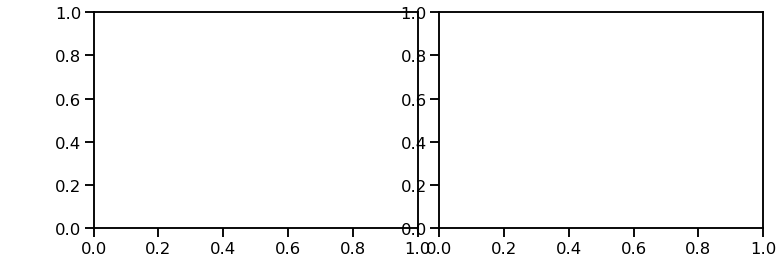

In [126]:
f,a =make_axes()
a[0].axis('off')